In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
import time
plt.style.use("dark_background")

$\Large Using \ a \ for \ loop$

In [118]:
"""
Trying out a sample code
"""


N = 1_000
# The height of the bins will be stored in this array:
data = np.zeros(10, dtype=int)
for i in range(N):
    # In each iteration, one of the bins are randomly chosen and increased by one.
    # Much similar to the random deposition model, but with 10 bins here.
    data[np.random.randint(0, 10)] += 1

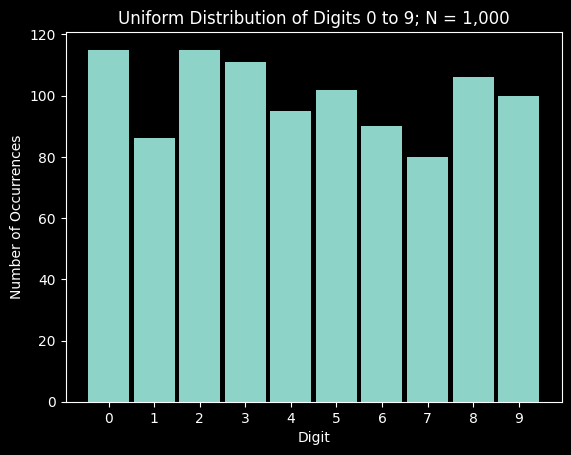

In [119]:
fig, ax = plt.subplots()

ax.bar(range(10), data, width=0.9);
ax.set_xticks(range(10));
ax.set_title("Uniform Distribution of Digits 0 to 9; N = 1,000")
ax.set_xlabel("Digit")
ax.set_ylabel("Number of Occurrences");

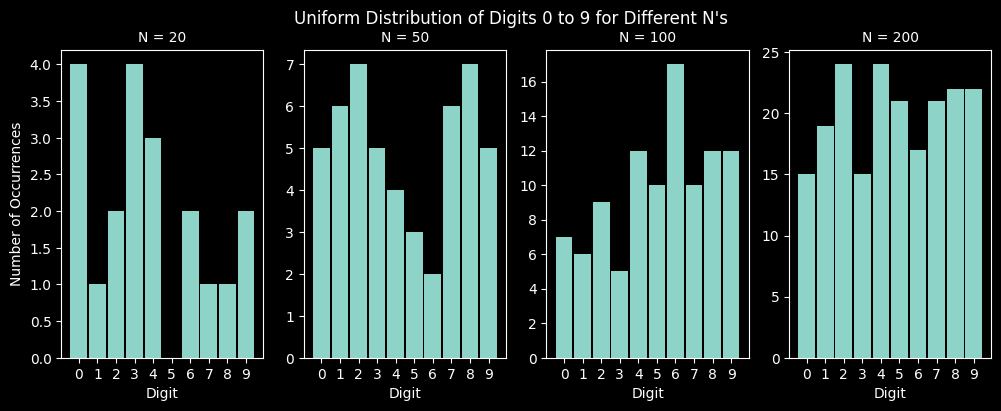

In [109]:
"""
Generalizing the code for different N's and plotting them all together:
"""


# The different N's:
Ns = np.array([20, 50, 100, 200])

# Plotting variables (adjusted for 4 N's):
fig, ax = plt.subplots(1, len(Ns), figsize=(12,4))


for i in range(len(Ns)):
    data = np.zeros(10, dtype=int)
    for j in range(Ns[i]):
        data[np.random.randint(0, 10)] += 1
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits 0 to 9 for Different N's")
    ax[i].bar(range(10), data, width=0.9);
    ax[i].set_xticks(range(10))
    ax[i].set_title(f"N = {Ns[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [110]:
# fig.savefig("Exercise6_1_1.jpg")

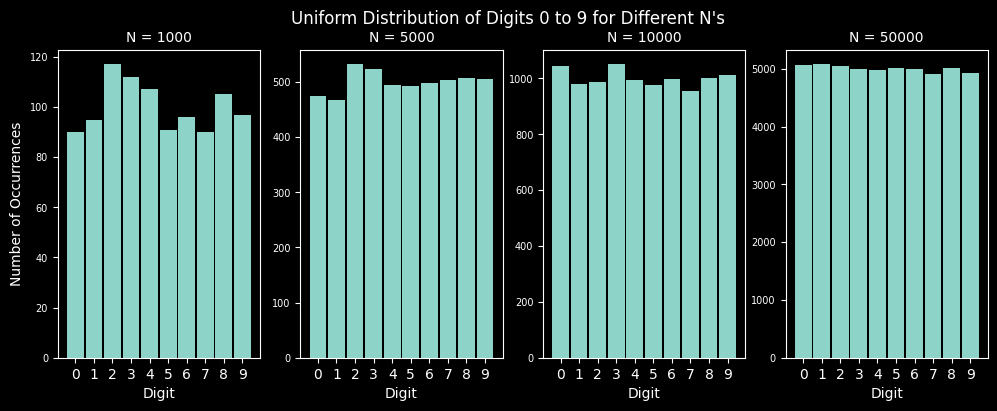

In [111]:
"""
Generalizing the code for different N's and plotting them all together:
"""


# The different N's:
Ns = np.array([1000, 5000, 10_000, 50_000])

# Plotting variables (adjusted for 4 N's):
fig, ax = plt.subplots(1, len(Ns), figsize=(12,4))


for i in range(len(Ns)):
    data = np.zeros(10, dtype=int)
    for j in range(Ns[i]):
        data[np.random.randint(0, 10)] += 1
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits 0 to 9 for Different N's")
    ax[i].bar(range(10), data, width=0.9)
    ax[i].set_xticks(range(10))
    ax[i].tick_params(axis="y", which="major", labelsize=7)
    ax[i].set_title(f"N = {Ns[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [113]:
# fig.savefig("Exercise6_1_2.jpg")

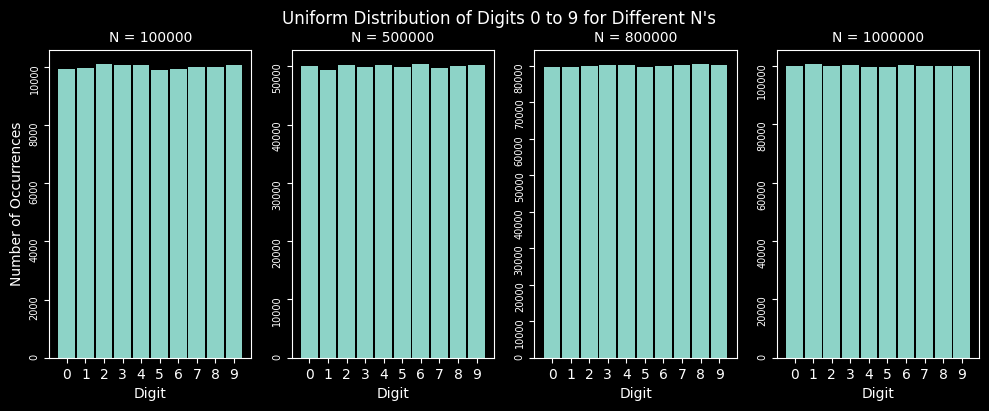

In [115]:
"""
Generalizing the code for different N's and plotting them all together:
"""


# This cell takes 4.5 seconds to execute.
# The different N's:
Ns = np.array([100_000, 500_000, 800_000, 1_000_000])

# Plotting variables (adjusted for 4 N's):
fig, ax = plt.subplots(1, len(Ns), figsize=(12,4))


for i in range(len(Ns)):
    data = np.zeros(10, dtype=int)
    for j in range(Ns[i]):
        data[np.random.randint(0, 10)] += 1
    # Putting the generated data into the subplots:
    fig.suptitle("Uniform Distribution of Digits 0 to 9 for Different N's")
    ax[i].bar(range(10), data, width=0.9)
    ax[i].set_xticks(range(10))
    ax[i].tick_params(axis="y", which="major", labelsize=7, rotation=90)
    ax[i].set_title(f"N = {Ns[i]}", fontsize=10)
    ax[i].set_xlabel("Digit")


ax[0].set_ylabel("Number of Occurrences");

In [116]:
# fig.savefig("Exercise6_1_3.jpg")

$\Large Direct \ to \ Histogram \ Method$

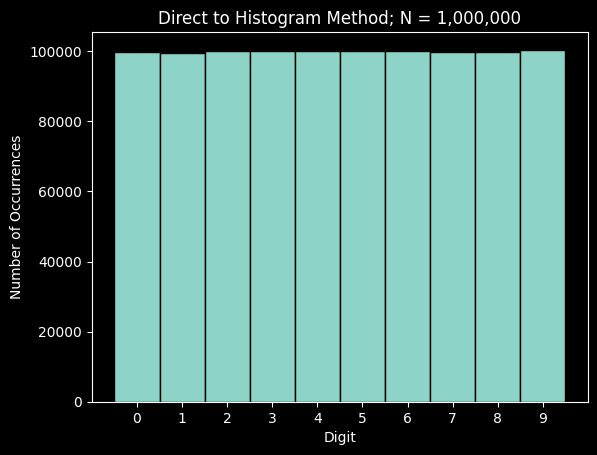

In [29]:
"""
This is a much faster method compared to the one described in the textbook.
It directly puts numpy random generator to use and plots the data in-place.
"""


N = 1_000_000
fig, ax = plt.subplots()
# bins=np.arange(11)-0.5 is for putting the digits in the middle of the bars instead of the left.
ax.hist(np.random.randint(low=0, high=10, size=N), bins=np.arange(11)-0.5, edgecolor="k")
ax.set_xticks(range(10))
ax.set_title("Direct to Histogram Method; N = 1,000,000")
ax.set_xlabel("Digit")
ax.set_ylabel("Number of Occurrences");


In [129]:
# fig.savefig("Exercise6_1_4.jpg")

$\Large Checking \ the \ Relation \ \log(\sigma) \sim \frac12\log(N)$

In [116]:
# This cell takes 40 seconds to execute.
# number of iterations:
N = 100_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 100
# "snapshots" start and step:
start = 1000
step = 1000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=N, step=step)
# After each iteration, "sigmas" will be stored in "DATA". In other words, "DATA"
# holds the whole ensemble.
DATA = np.zeros(shape=(ensemble_size, len(snapshots)))
for j in range(ensemble_size):
    # This array will hold the number of occurrences of each digit:
    data = np.zeros(10, dtype=int)
    # The standard deviation of each snapshot of data will be stored in this array:
    sigmas = np.zeros(len(snapshots))
    for i in range(N):
        data[np.random.randint(low=0, high=10)] += 1
        if i+1 in snapshots:
            sigmas[i//step] = np.std(data)
    DATA[j] = sigmas

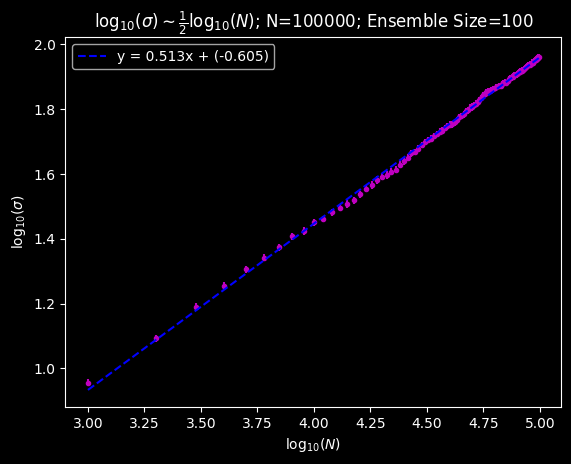

In [117]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(DATA, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; N={N}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(DATA), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [118]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(DATA), axis=0))}")

The slope is 0.5129974748427685 +- 0.10231368797137469


In [119]:
# fig.savefig("Exercise6_1_7.jpg")

In [85]:
# This cell takes 6.5 minutes.
# number of iterations:
N = 1_000_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 100
# "snapshots" start and step:
start = 10000
step = 10000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=N, step=step)
# After each iteration, "sigmas" will be stored in "DATA". In other words, "DATA"
# holds the whole ensemble.
DATA = np.zeros(shape=(ensemble_size, len(snapshots)))
for j in range(ensemble_size):
    # This array will hold the number of occurrences of each digit:
    data = np.zeros(10, dtype=int)
    # The standard deviation of each snapshot of data will be stored in this array:
    sigmas = np.zeros(len(snapshots))
    for i in range(N):
        data[np.random.randint(low=0, high=10)] += 1
        if i+1 in snapshots:
            sigmas[i//step] = np.std(data)
    DATA[j] = sigmas

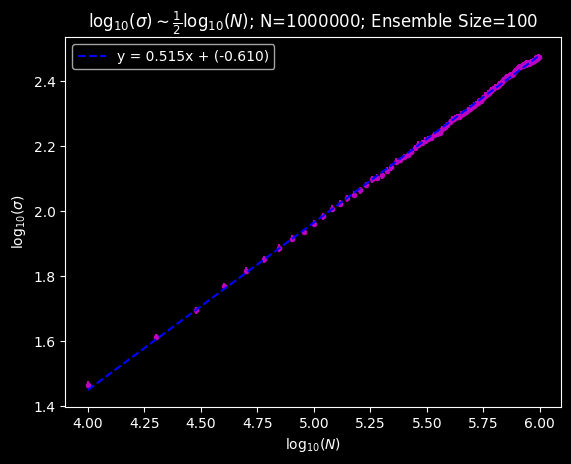

In [89]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(DATA, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; N={N}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(DATA), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [96]:
# fig.savefig("Exercise6_1_8.jpg")

In [94]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(DATA), axis=0))}")

The slope is 0.5147172991089088 +- 0.09949259557333176


In [102]:
# This cell takes 6 minutes and 30 seconds.
# number of iterations:
N = 100_000
# The number of times we run the program. It is used to find the statistical error of the result.
ensemble_size = 1000
# "snapshots" start and step:
start = 1000
step = 1000
# As the variable "data" is changed in each iteration of the for loop,
# we take snapshots of it and calculate its standard deviation in these iterations:
snapshots = np.arange(start=start, stop=N, step=step)
# After each iteration, "sigmas" will be stored in "DATA". In other words, "DATA"
# holds the whole ensemble.
DATA = np.zeros(shape=(ensemble_size, len(snapshots)))
for j in range(ensemble_size):
    # This array will hold the number of occurrences of each digit:
    data = np.zeros(10, dtype=int)
    # The standard deviation of each snapshot of data will be stored in this array:
    sigmas = np.zeros(len(snapshots))
    for i in range(N):
        data[np.random.randint(low=0, high=10)] += 1
        if i+1 in snapshots:
            sigmas[i//step] = np.std(data)
    DATA[j] = sigmas

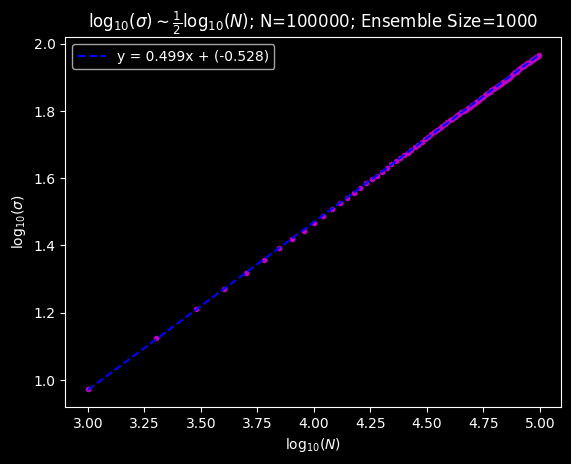

In [109]:
# Preparing data for plotting:
xs = np.log10(snapshots)
ys = np.log10(np.mean(DATA, axis=0))
# Preparing a best fit line:
coefs = np.polynomial.polynomial.polyfit(xs, ys, deg=1)
ffit = np.polynomial.polynomial.polyval(xs, coefs)
# Initiating the plot:
fig, ax = plt.subplots()
ax.plot(xs, ffit, "b--", label=f"y = {coefs[1]:.3f}x + ({coefs[0]:.3f})", zorder=2)
ax.set_title(f"$\log_{{10}}(\sigma) \sim \\frac{{1}}{{2}}\log_{{10}}(N)$; N={N}; Ensemble Size={ensemble_size}")
ax.set_xlabel("$\log_{{10}}(N)$")
ax.set_ylabel("$\log_{{10}}(\sigma)$")
ax.legend();
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(DATA), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [110]:
# fig.savefig("Exercise6_1_9.jpg")

In [105]:
print(f"The slope is {coefs[1]} +- {np.mean(np.std(np.log10(DATA), axis=0))}")

The slope is 0.4992260352269891 +- 0.10991581805704308
